#                   Mehrdad Baradaran - Cifar-10 Classification CNN
#                                  99222020 - assignment 2

In this series of exercises, we try to train 50,000 photos from 10 classes. To implement the neural network, we use convolution and pooling layers to have fewer parameters so that we can train easily. In addition, we check the effects of the number of blocks and hidden layers and use dropout and early stopping methods to obtain higher accuracy and display these changes in the graph. Let's go to start!.

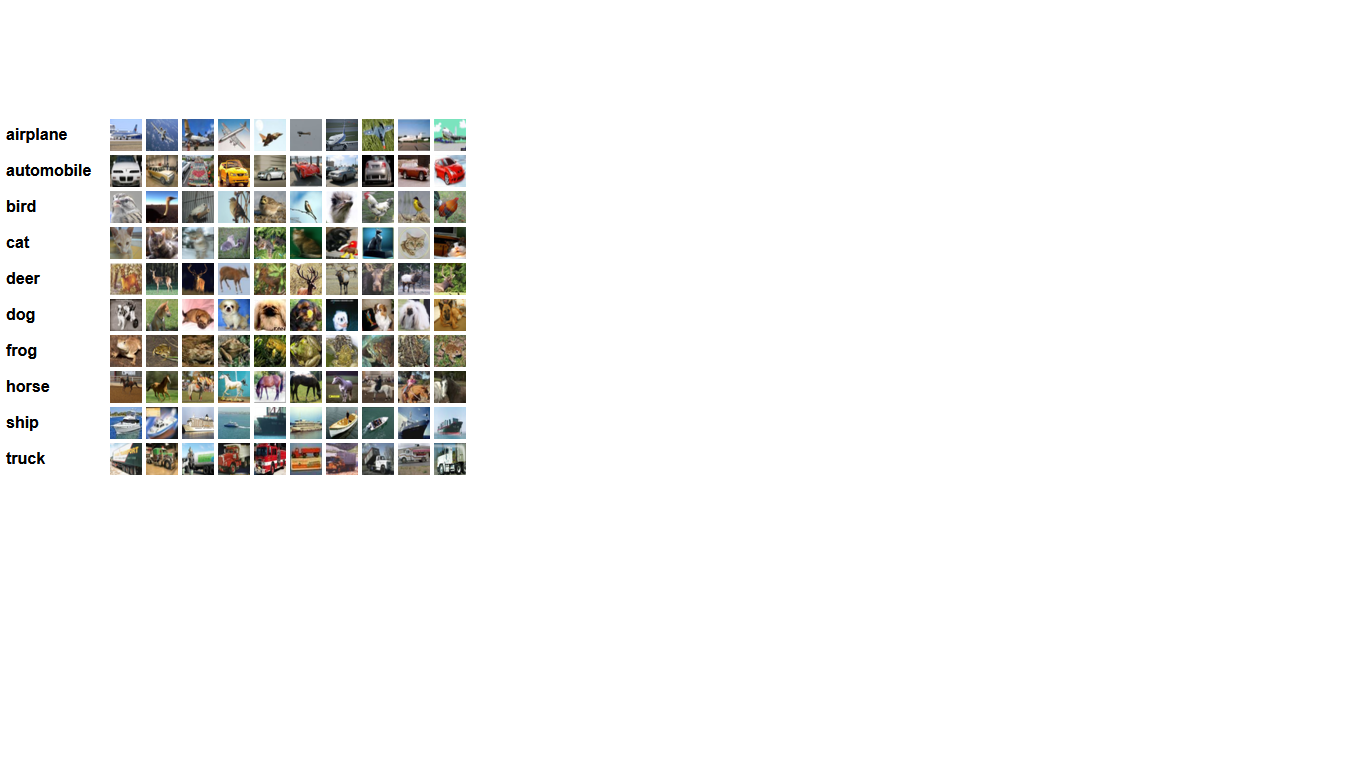

# Import libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load CIFAR_10 Data

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

# Check for Shapes and Types

In [3]:
train_x.shape, train_x.dtype, type(train_x)

((50000, 32, 32, 3), dtype('uint8'), numpy.ndarray)

In [4]:
train_y.shape, train_y.dtype, type(train_y)

((50000, 1), dtype('uint8'), numpy.ndarray)

In [5]:
test_x.shape, test_x.dtype, type(test_x)

((10000, 32, 32, 3), dtype('uint8'), numpy.ndarray)

In [6]:
test_y.shape, test_y.dtype, type(test_y)

((10000, 1), dtype('uint8'), numpy.ndarray)

# plot some pics of CIFAR_10 Dataset

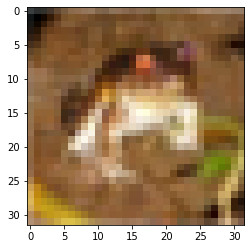

In [7]:
plt.imshow(train_x[0])

In [8]:
train_y[0]

array([6], dtype=uint8)

In this dataset, the sixth grade belongs to frogs!

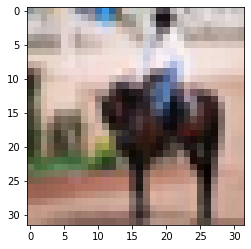

In [9]:
plt.imshow(train_x[11])

In [10]:
train_y[11]

array([7], dtype=uint8)

# import to_categorical method for converting labels to one-hot 

In converting the labels to one-hot, instead of displaying the number of each class, we create an array with the length of the number of classes, and in that we display the probability of the existence of each class, which is used in such a way that all the elements of the array are zero and the index to which the photo belongs that class is one.
Or is it that all the numerical elements are between 0 or 1, that the probability of each class in that photo is shown .
the sum of all the numbers must be equal to 1.

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_cat_y = to_categorical(train_y, num_classes=10)
train_cat_y.shape, train_cat_y.dtype

((50000, 10), dtype('float32'))

In [13]:
test_cat_y = to_categorical(test_y, num_classes=10)
test_cat_y.shape, test_cat_y.dtype

((10000, 10), dtype('float32'))

# Check new labels

In [14]:
train_cat_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
train_cat_y[11]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Normalize Data

Inputs between 0 and 1 . type shoud be float32

In [16]:
train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

In [17]:
train_x.shape, train_x.max(), train_x.min(), train_x.dtype

((50000, 32, 32, 3), 1.0, 0.0, dtype('float32'))

In [18]:
test_x.shape, test_x.max(), test_x.min(), test_x.dtype

((10000, 32, 32, 3), 1.0, 0.0, dtype('float32'))

# Reshape Data 

input : (None, height, weight, channel) , output : (None, class_numbers)                                                       
output should be one-hot                                                                                                       
we want to data to be network compatible

Since all train and test data and labels have correct dimensions and can be trained, we do not need to reshape.

# Recheck Data

In [19]:
train_x.shape, train_x.dtype

((50000, 32, 32, 3), dtype('float32'))

In [20]:
train_cat_y.shape, train_cat_y.dtype

((50000, 10), dtype('float32'))

In [21]:
test_x.shape, test_x.dtype

((10000, 32, 32, 3), dtype('float32'))

In [22]:
test_cat_y.shape, test_cat_y.dtype

((10000, 10), dtype('float32'))

All is well!

# Create CNN Model

### import libraries

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPool2D, Conv2D, Flatten, GlobalAveragePooling2D, ReLU, Activation

In [25]:
input = Input(shape=(32, 32, 3))

#block1
x = Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same')(input)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#block2
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#block3
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#flatten
x = Flatten()(x)

# fully connected
x = Dense(units=128)(x)
x = ReLU()(x)

x = Dense(units=10)(x)
output = Activation(activation='softmax')(x)

cnn_model = Model(input, output)
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 re_lu_4 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 re_lu_5 (ReLU)              (None, 16, 16, 64)        0         
                                                             

# Compile my Model

In [26]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Data using Early Stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

In [31]:
cnn_model.fit(x=train_x, y=train_cat_y, epochs=30, batch_size=32,
              validation_data=(test_x, test_cat_y), callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 100s 63ms/step - loss: 1.4461 - accuracy: 0.4758 - val_loss: 1.1300 - val_accuracy: 0.6029
Epoch 2/30
1563/1563 [==============================] - 104s 66ms/step - loss: 1.0247 - accuracy: 0.6387 - val_loss: 0.9538 - val_accuracy: 0.6689
Epoch 3/30
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8383 - accuracy: 0.7050 - val_loss: 0.9057 - val_accuracy: 0.6874
Epoch 4/30
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7182 - accuracy: 0.7489 - val_loss: 0.8383 - val_accuracy: 0.7071
Epoch 5/30
1563/1563 [==============================] - 103s 66ms/step - loss: 0.6254 - accuracy: 0.7804 - val_loss: 0.8783 - val_accuracy: 0.7034
Epoch 6/30
1563/1563 [==============================] - 104s 67ms/step - loss: 0.5417 - accuracy: 0.8099 - val_loss: 0.9002 - val_accuracy: 0.7033
Epoch 7/30
1563/1563 [==============================] - 103s 66ms/step - loss: 0.4689 - accuracy: 0.8340 - val_loss: 0

# Plot History of Model

<AxesSubplot:>

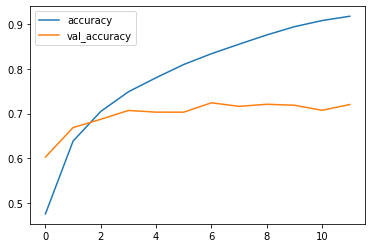

In [36]:
model_history = pd.DataFrame(cnn_model.history.history)
model_history[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

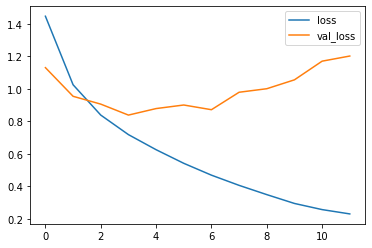

In [37]:
model_history[['loss', 'val_loss']].plot()

# Evaluate Model

In [38]:
cnn_model.evaluate(test_x, test_cat_y)

313/313 [==============================] - 5s 16ms/step - loss: 0.8714 - accuracy: 0.7243


[0.871376633644104, 0.7243000268936157]

# Sparse Model

In [40]:
predictions = cnn_model.predict(test_x)
predictions_sparse = np.argmax(predictions, axis=1)
predictions[0], predictions_sparse[0]

313/313 [==============================] - 5s 16ms/step


(array([1.3141484e-04, 1.4132947e-03, 4.6473715e-04, 6.9945353e-01,
        4.6539153e-05, 2.6557797e-01, 6.7096837e-03, 7.1045570e-06,
        2.6175009e-02, 2.0679985e-05], dtype=float32),
 3)

# Classification report and Confusion_Matrix

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(classification_report(test_y, predictions_sparse))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1000
           1       0.83      0.85      0.84      1000
           2       0.61      0.62      0.62      1000
           3       0.53      0.57      0.55      1000
           4       0.72      0.63      0.67      1000
           5       0.56      0.72      0.63      1000
           6       0.82      0.75      0.78      1000
           7       0.79      0.75      0.77      1000
           8       0.83      0.84      0.84      1000
           9       0.81      0.78      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.73     10000
weighted avg       0.73      0.72      0.73     10000



In [43]:
confusion_matrix(test_y, predictions_sparse)

array([[720,  17,  70,  22,  14,  14,  13,  12,  71,  47],
       [ 10, 855,  12,  10,   2,   7,   7,   1,  28,  68],
       [ 42,   7, 625,  77,  77,  78,  43,  32,  12,   7],
       [ 11,  14,  51, 569,  40, 215,  39,  36,  13,  12],
       [ 14,   1,  80,  93, 631,  78,  32,  58,   7,   6],
       [  6,   5,  43, 144,  27, 719,  16,  32,   2,   6],
       [  6,   7,  51,  91,  28,  50, 750,   6,   7,   4],
       [ 11,   3,  42,  35,  52,  91,   3, 751,   2,  10],
       [ 32,  31,  28,  16,   5,  15,   3,   7, 842,  21],
       [ 19,  94,  18,  24,   4,  19,   5,  11,  25, 781]], dtype=int64)

# Show some Predictions

In [44]:
cnn_model.predict(np.reshape(test_x[0], (1, 32, 32, 3))).argmax()

1/1 [==============================] - 0s 25ms/step


3

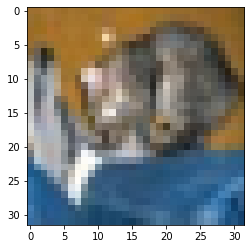

In [45]:
plt.imshow(test_x[0])

In [46]:
test_y[0]

array([3], dtype=uint8)

# CNN Model with more Hidden layer and GlobalAveragePooling

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPool2D
from tensorflow.keras.layers import Conv2D, Flatten, GlobalAveragePooling2D, ReLU, Activation

In [51]:
input = Input(shape=(32, 32, 3))

#block1
x = Conv2D(filters=32, kernel_size=(7, 7), strides=1, padding='same')(input)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#block2
x = Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#block3
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#block4
x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#globalaveragepooling
x = GlobalAveragePooling2D()(x)

# fully connected
x = Dense(units=128)(x)
x = ReLU()(x)
x = Dense(units=32)(x)
x = ReLU()(x)
x = Dense(units=10)(x)
output = Activation(activation='softmax')(x)

cnn_model2 = Model(input, output)
cnn_model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        4736      
                                                                 
 re_lu_21 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 re_lu_22 (ReLU)             (None, 16, 16, 64)        0         
                                                           

In [62]:
cnn_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop2 = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

In [65]:
cnn_model2.fit(x=train_x, y=train_cat_y, epochs=30, batch_size=32, validation_data=(test_x, test_cat_y), callbacks=[early_stop2])

Epoch 1/30
1563/1563 [==============================] - 212s 135ms/step - loss: 1.6838 - accuracy: 0.3710 - val_loss: 1.4338 - val_accuracy: 0.4726
Epoch 2/30
1563/1563 [==============================] - 220s 141ms/step - loss: 1.2687 - accuracy: 0.5411 - val_loss: 1.1507 - val_accuracy: 0.5866
Epoch 3/30
1563/1563 [==============================] - 224s 143ms/step - loss: 1.0663 - accuracy: 0.6192 - val_loss: 1.0549 - val_accuracy: 0.6240
Epoch 4/30
1563/1563 [==============================] - 221s 141ms/step - loss: 0.9139 - accuracy: 0.6793 - val_loss: 0.9896 - val_accuracy: 0.6522
Epoch 5/30
1563/1563 [==============================] - 220s 141ms/step - loss: 0.8010 - accuracy: 0.7190 - val_loss: 0.9426 - val_accuracy: 0.6752
Epoch 6/30
1563/1563 [==============================] - 215s 138ms/step - loss: 0.7001 - accuracy: 0.7547 - val_loss: 0.9185 - val_accuracy: 0.6875
Epoch 7/30
1563/1563 [==============================] - 215s 138ms/step - loss: 0.6039 - accuracy: 0.7887 - val_

<AxesSubplot:>

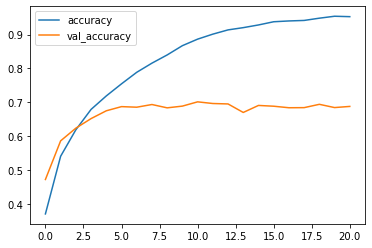

In [66]:
model_history2 = pd.DataFrame(cnn_model2.history.history)
model_history2[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

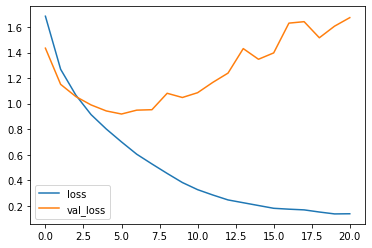

In [67]:
model_history2[['loss', 'val_loss']].plot()

In [68]:
cnn_model2.evaluate(test_x, test_cat_y)

313/313 [==============================] - 9s 28ms/step - loss: 1.0853 - accuracy: 0.7016


[1.0853139162063599, 0.7016000151634216]

In [69]:
predictions2 = cnn_model2.predict(test_x)
predictions_sparse2 = np.argmax(predictions2, axis=1)
predictions2[0], predictions_sparse2[0]

313/313 [==============================] - 9s 27ms/step


(array([0.05668004, 0.05526455, 0.00238728, 0.77401835, 0.00213873,
        0.03204102, 0.01024812, 0.00196561, 0.01592639, 0.04932988],
       dtype=float32),
 3)

In [70]:
print(classification_report(test_y, predictions_sparse2))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.84      0.81      0.83      1000
           2       0.53      0.67      0.59      1000
           3       0.50      0.50      0.50      1000
           4       0.70      0.61      0.65      1000
           5       0.62      0.59      0.60      1000
           6       0.71      0.78      0.74      1000
           7       0.79      0.74      0.76      1000
           8       0.85      0.80      0.83      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [71]:
confusion_matrix(test_y, predictions_sparse2)

array([[743,   9,  96,  17,  14,   6,  14,   8,  49,  44],
       [ 11, 813,  15,  11,   2,   6,  10,   5,  34,  93],
       [ 47,   7, 671,  66,  66,  37,  77,  20,   4,   5],
       [ 22,  14, 114, 498,  39, 175,  87,  34,   8,   9],
       [ 19,   6, 133,  69, 607,  47,  60,  49,   5,   5],
       [  7,   7,  83, 166,  39, 593,  41,  53,   4,   7],
       [  5,   8,  58,  75,  27,  37, 779,   2,   6,   3],
       [ 16,   2,  52,  55,  62,  52,   8, 736,   3,  14],
       [ 77,  24,  25,  19,   8,   4,   9,   7, 804,  23],
       [ 32,  79,  30,  25,   5,   4,   8,  17,  28, 772]], dtype=int64)

# CNN Model using Batch_normalization and Dropout

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPool2D
from tensorflow.keras.layers import Conv2D, Flatten, GlobalAveragePooling2D, ReLU, Activation, BatchNormalization

In [116]:
input = Input(shape=(32, 32, 3))

#block1
x = Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#block2
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#block3
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

#flatten
x = Flatten()(x)

# fully connected
x = Dense(units=128)(x)
x = ReLU()(x)
x = Dense(units=10)(x)
output = Activation(activation='softmax')(x)

cnn_model3 = Model(input, output)
cnn_model3.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_51 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_96 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 16, 16, 64)        184

In [117]:
cnn_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
cnn_model3.fit(x=train_x, y=train_cat_y, epochs=30, batch_size=32, validation_data=(test_x, test_cat_y), callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 138s 88ms/step - loss: 1.3039 - accuracy: 0.5349 - val_loss: 1.4107 - val_accuracy: 0.5331
Epoch 2/30
1563/1563 [==============================] - 144s 92ms/step - loss: 0.8979 - accuracy: 0.6853 - val_loss: 1.0579 - val_accuracy: 0.6297
Epoch 3/30
1563/1563 [==============================] - 143s 92ms/step - loss: 0.7555 - accuracy: 0.7371 - val_loss: 1.3228 - val_accuracy: 0.5983
Epoch 4/30
1563/1563 [==============================] - 142s 91ms/step - loss: 0.6588 - accuracy: 0.7695 - val_loss: 0.8341 - val_accuracy: 0.7119
Epoch 5/30
1563/1563 [==============================] - 150s 96ms/step - loss: 0.5817 - accuracy: 0.7968 - val_loss: 0.9824 - val_accuracy: 0.6633
Epoch 6/30
1563/1563 [==============================] - 144s 92ms/step - loss: 0.5123 - accuracy: 0.8221 - val_loss: 0.7841 - val_accuracy: 0.7370
Epoch 7/30
1563/1563 [==============================] - 141s 90ms/step - loss: 0.4509 - accuracy: 0.8414 - val_loss: 1

<AxesSubplot:>

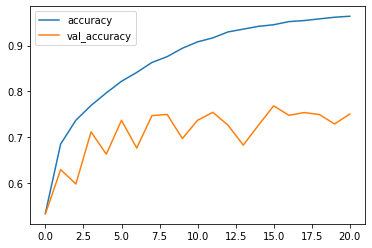

In [119]:
model_history3 = pd.DataFrame(cnn_model3.history.history)
model_history3[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

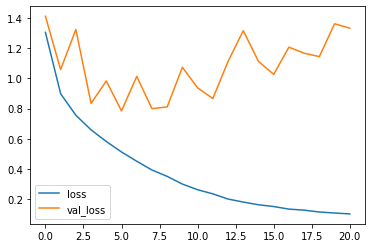

In [120]:
model_history3[['loss', 'val_loss']].plot()

In [121]:
cnn_model3.evaluate(test_x, test_cat_y)

313/313 [==============================] - 7s 21ms/step - loss: 1.0260 - accuracy: 0.7687


[1.0259929895401, 0.7687000036239624]

In [122]:
predictions3 = cnn_model3.predict(test_x)
predictions_sparse3 = np.argmax(predictions3, axis=1)
predictions3[0], predictions_sparse3[0]

313/313 [==============================] - 6s 20ms/step


(array([1.7266836e-02, 4.6387175e-04, 3.6339355e-07, 9.5014435e-01,
        2.1161333e-07, 1.6581584e-02, 7.9665035e-05, 5.8303767e-10,
        1.5462052e-02, 1.1197709e-06], dtype=float32),
 3)

In [123]:
print(classification_report(test_y, predictions_sparse3))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1000
           1       0.90      0.85      0.87      1000
           2       0.78      0.59      0.67      1000
           3       0.63      0.55      0.59      1000
           4       0.66      0.83      0.74      1000
           5       0.67      0.71      0.69      1000
           6       0.78      0.87      0.82      1000
           7       0.83      0.77      0.80      1000
           8       0.87      0.87      0.87      1000
           9       0.85      0.83      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [124]:
confusion_matrix(test_y, predictions_sparse3)

array([[822,  14,  45,  11,  15,   6,  10,  11,  46,  20],
       [ 24, 849,   2,   8,   4,   2,   7,   1,  20,  83],
       [ 59,   4, 590,  53, 113,  57,  75,  38,  10,   1],
       [ 23,   3,  26, 548,  87, 173,  76,  36,  20,   8],
       [ 22,   3,  27,  34, 829,  24,  33,  21,   5,   2],
       [ 18,   4,  25, 117,  54, 709,  24,  39,   7,   3],
       [  3,   1,  18,  29,  45,  18, 873,   4,   6,   3],
       [ 16,   2,  15,  40,  96,  46,   8, 771,   2,   4],
       [ 61,  11,   8,  10,   4,   8,   5,   4, 870,  19],
       [ 45,  54,   3,  17,   8,   9,  12,   9,  17, 826]], dtype=int64)